Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. 

Hypothesis generation:The aim of this data science project is to build a predictivemodel and find out the sales of each product at a particular store.

In [ ]:
#importing the necessary modules required to solve the problem
#Loading Packages and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/Train[1].csv")
print(data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

Reading file from csv file.

In [ ]:
df=pd.read_csv("/content/Test[1].csv")
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [ ]:
concting=pd.concat([data,df])
print(concting)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15        17.50          Low Fat         0.016760   
3              FDX07        19.20          Regular         0.000000   
4              NCD19         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
5676           FDB58        10.50          Regular         0.013496   
5677           FDD47         7.60          Regular         0.142991   
5678           NCO17        10.00          Low Fat         0.073529   
5679           FDJ26        15.30          Regular         0.000000   
5680           FDU37         9.50          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
#Exploratory Data Analysis
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [ ]:
data.shape

(8523, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


checking for missing values: let us check for null values in the given data

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here we can see that Item_weight has 1463 missing values and Outlet_Size has 2410 missing values Now let us treat these missing values by using mean and mode.


Missing Value Treatment

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

0


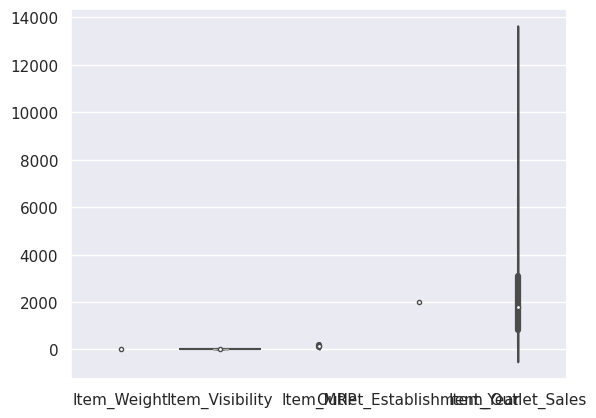

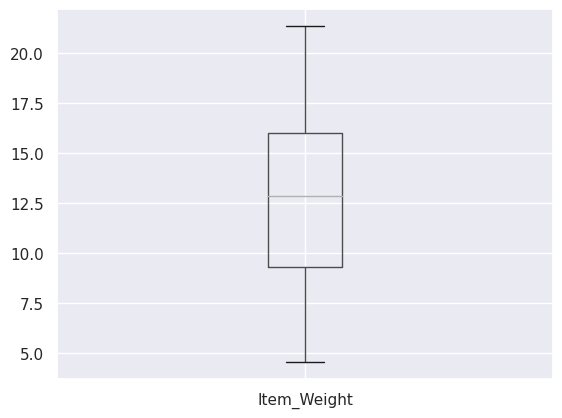

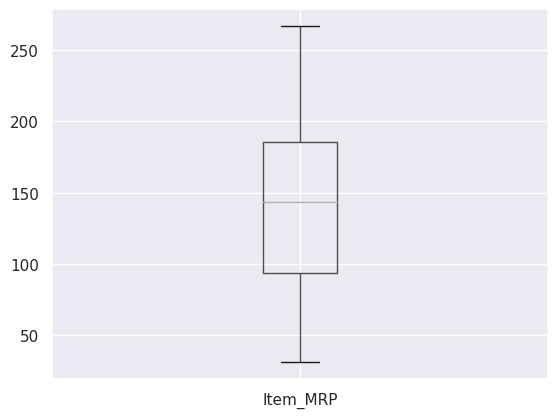

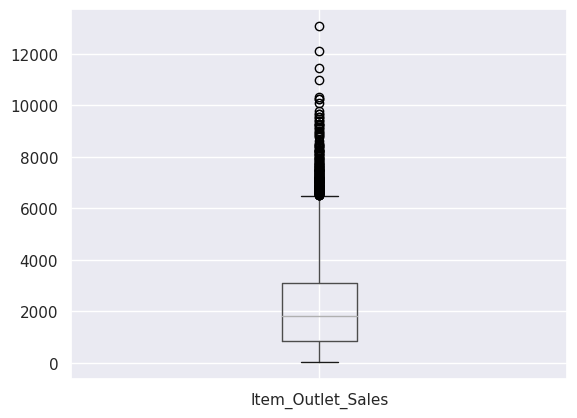

In [ ]:
#Univariate Analysis
data.boxplot(column=['Item_Weight'])
sns.violinplot(column=['Item_MRP'],data=data)
plt.show()

data.boxplot(column=['Item_Weight'])
plt.show()
data.boxplot(column=['Item_MRP'])
plt.show()
data.boxplot(column=['Item_Outlet_Sales'])
plt.show()

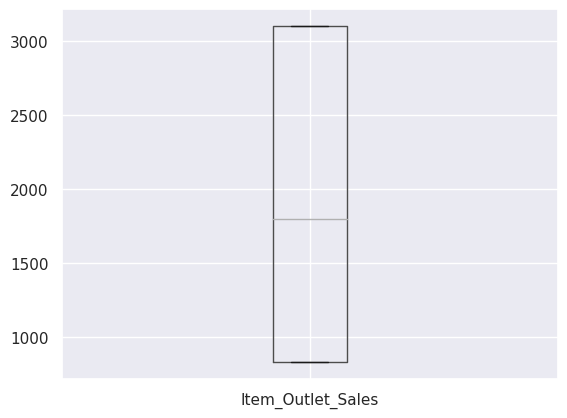

In [ ]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    lower_range=q1-(1.5 * 0.25)
    upper_range=q3-(1.5 *0.75)
    return lower_range,upper_range
lowsales,uppsales=remove_outlier(concting['Item_Outlet_Sales'])
data['Item_Outlet_Sales']=np.where(data['Item_Outlet_Sales']>uppsales,uppsales,data['Item_Outlet_Sales'])
data['Item_Outlet_Sales']=np.where(data['Item_Outlet_Sales']<lowsales,lowsales,data['Item_Outlet_Sales'])
data.boxplot(column=['Item_Outlet_Sales'])
plt.show()

<ipython-input-201-b91f54a0a852>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv=data.cov()
<ipython-input-201-b91f54a0a852>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()
<ipython-input-201-b91f54a0a852>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)



                            Item_Weight  Item_Visibility      Item_MRP  \
Item_Weight                  17.860122        -0.002627      6.515364   
Item_Visibility              -0.002627         0.002662     -0.004225   
Item_MRP                      6.515364        -0.004225   3878.183909   
Outlet_Establishment_Year    -0.293684        -0.032325      2.617143   
Item_Outlet_Sales            64.949384        -6.493954  32156.223367   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.293684          64.949384  
Item_Visibility                            -0.032325          -6.493954  
Item_MRP                                    2.617143       32156.223367  
Outlet_Establishment_Year                  70.086372         -27.820732  
Item_Outlet_Sales                         -27.820732      850615.204255  

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000      

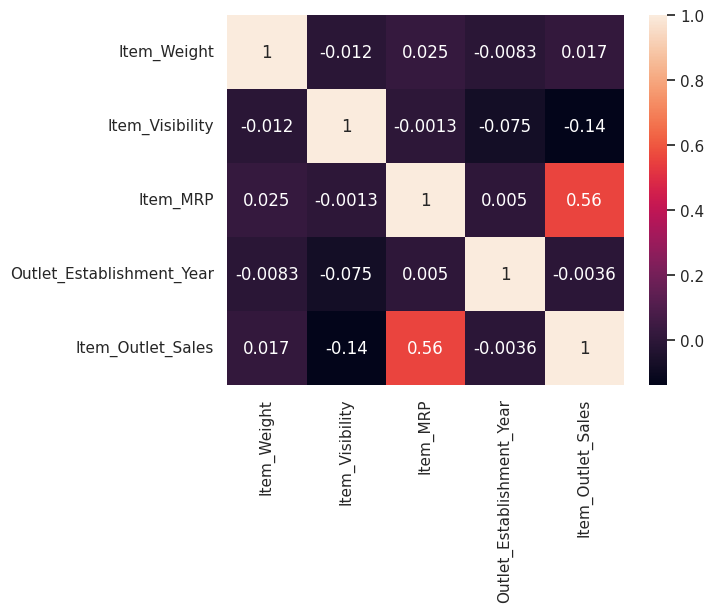

In [ ]:
#Bivariate Analysis
covv=data.cov()
print("\n",covv)

corr=data.corr()
print("\n",corr)

sns.heatmap(data.corr(),annot=True)
plt.show()

Feature Engineering

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Item_Fat_Content']= data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Encoding Categorical Variables and One Hot Encoding

In [ ]:
from sklearn import preprocessing
print(data.head())
O_TYPE = pd.get_dummies(data['Outlet_Type'])
O_LOCATION_T = pd.get_dummies(data['Outlet_Location_Type'])
O_SIZE = pd.get_dummies(data['Outlet_Size'])
I_FAT = pd.get_dummies(data['Item_Fat_Content'])

NW_data = pd.concat([data,O_TYPE,O_LOCATION_T,O_SIZE,I_FAT],axis=1)
print(NW_data)

label = NW_data['Item_Outlet_Sales']

train = NW_data.drop(columns=['Item_Identifier','Item_Weight','Outlet_Type','Outlet_Identifier','Item_Fat_Content','Item_Outlet_Sales','Outlet_Location_Type','Item_Type','Outlet_Size','Outlet_Establishment_Year'])
print(train)
data_types_dict = {'Item_Identifier': int,'Item_Fat_Content': int,'Item_Type': int,'Outlet_Identifier': int
    ,'Outlet_Size': int,'Outlet_Location_Type': int,'Outlet_Type': int}

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [ ]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training:

Linear Regression


In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine (more info on wikipedia).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.48751945576740263


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.4710747785274133


Regularized Linear Regression

Lasso

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces - more info on wikipedia.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.48751459040294376


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.47100510179582644


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.4875193876352599


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.4710695526998201


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.4875193876352599


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.4710695526998201


Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees (more info on medium).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train =r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9395945703848642


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5509241152710131


In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.8526890932679335


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = r2_score(Y_test, test_data_prediction)

In [ ]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5391088929056895


  As The errors in the model 